# Package and Data Import

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
plt.style.use('seaborn') 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [196]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

train_df.describe()
test_df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Decription

In [79]:
def barplot_for_cate(df, col, hue = None):
    f, ax = plt.subplots(1, 2, figsize=(18,8)) 
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
    
    sns.countplot(col, data=df, hue = hue, palette="Set2", ax = ax[1]) 
    plt.show()

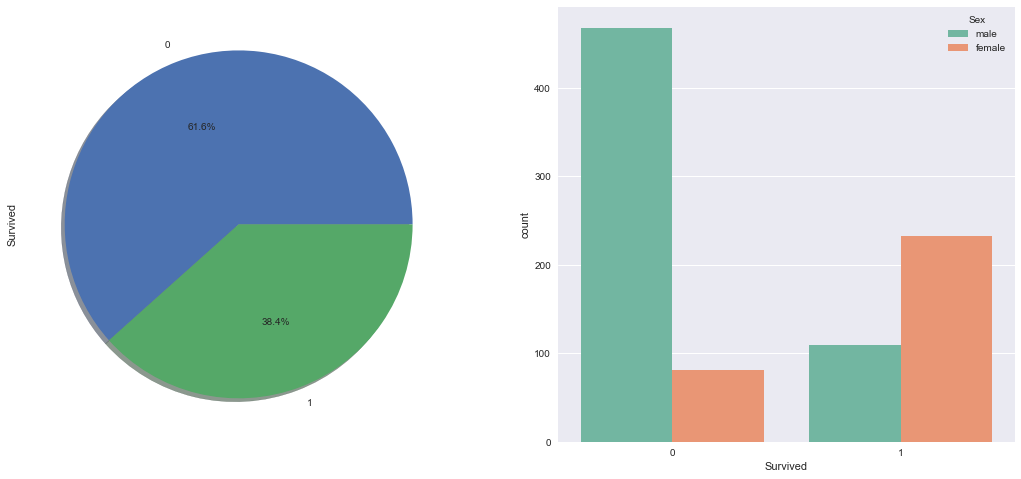

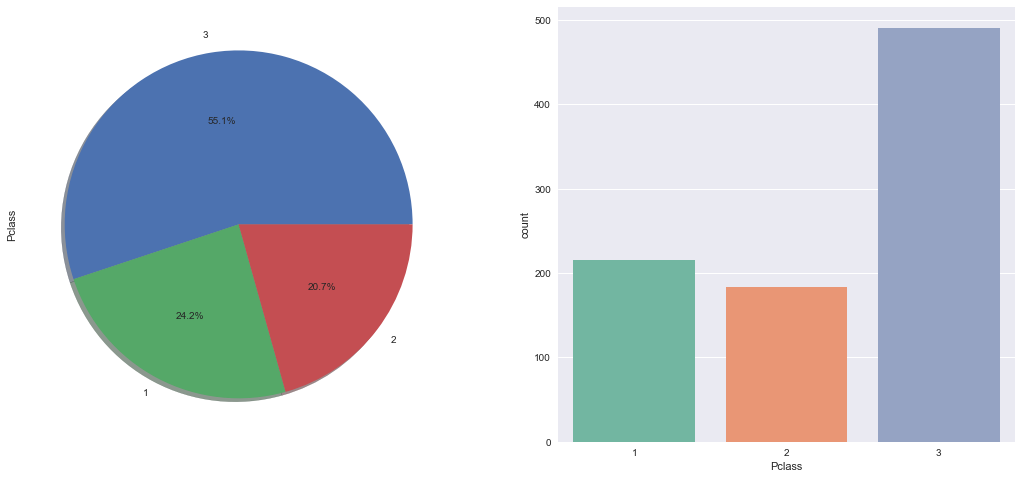

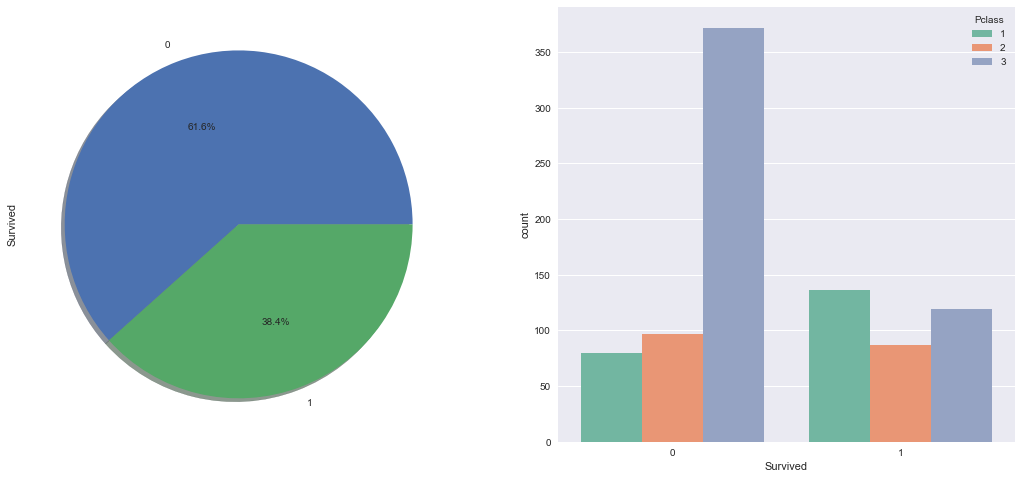

In [80]:
#barplot_for_cate(train_df, 'Survived')
barplot_for_cate(train_df, 'Survived', 'Sex')
barplot_for_cate(train_df, 'Pclass')
barplot_for_cate(train_df, 'Survived', 'Pclass')

In [81]:
def scatter_continuous(df, con_col, target_col):
    plt.scatter(df.loc[df[con_col].notnull(), con_col], df.loc[df[con_col].notnull(), target_col])
    plt.show()

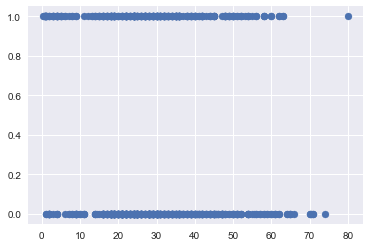

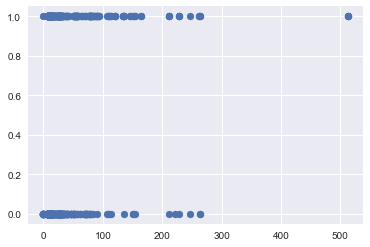

In [82]:
scatter_continuous(train_df, 'Age', 'Survived')
scatter_continuous(train_df, 'Fare', 'Survived')

In [83]:
def hist_plot(df, con_col, target_col):
    items = list(set(df[target_col]))
    item_num = len(items)
    f, ax = plt.subplots(1, item_num, figsize=(18,8))
    for i in range(item_num):
        df.loc[df[target_col]==items[i], con_col].plot.hist(ax=ax[i], bins=20, edgecolor='black', color='pink')
        ax[i].set_title(target_col+'='+str(items[i]))

    plt.show()


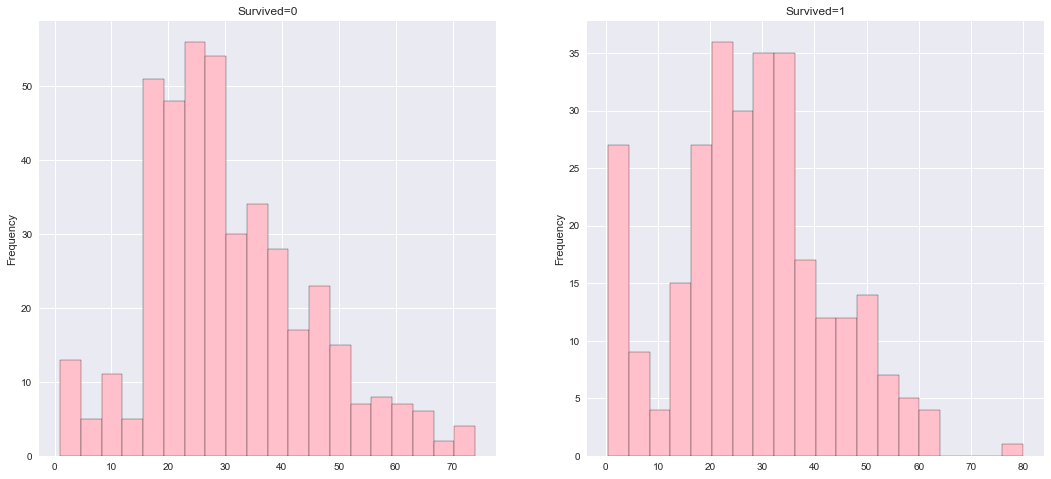

In [84]:
hist_plot(train_df, 'Age', 'Survived')

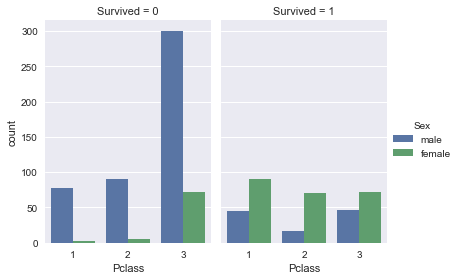

In [85]:
pd.crosstab([train_df['Sex'], train_df['Survived']], train_df['Pclass'], margins=True).style.background_gradient(cmap='summer_r')
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=train_df, kind="count", height=4, aspect=.7)

In [86]:
for x in ['Sex', 'Pclass', 'Cabin', 'Embarked']:
    train_df[[x, 'Survived']].groupby([x]).agg(['count', 'mean'])

Survived          
          count      mean
Sex                      
female      314  0.742038
male        577  0.188908

Survived          
          count      mean
Pclass                   
1           216  0.629630
2           184  0.472826
3           491  0.242363

Survived     
         count mean
Cabin              
A10          1  0.0
A14          1  0.0
A16          1  1.0
A19          1  0.0
A20          1  1.0
...        ...  ...
F33          3  1.0
F38          1  0.0
F4           2  1.0
G6           4  0.5
T            1  0.0

[147 rows x 2 columns]

Survived          
            count      mean
Embarked                   
C             168  0.553571
Q              77  0.389610
S             644  0.336957

In [197]:
train_df[['Sex', 'Survived']].groupby(['Sex']).agg(['count', 'mean'])

Survived          
          count      mean
Sex                      
female      314  0.742038
male        577  0.188908

# Feature Engineering

In [198]:
df = pd.concat([train_df, test_df])

In [166]:
def cate_others(temp):
    temp_cnt = Counter(temp)
    other_list = []
    for x in temp_cnt.keys():
        if temp_cnt[x] <=20:
            other_list.append(x)
    return other_list

In [199]:
temp = df['Name'].str.extract('([A-Za-z]+)\.')[0].to_list()
other_list = cate_others(temp)

In [200]:
df['prefix'] = df['Name'].str.extract('([A-Za-z]+)\.')
df['prefix'] = df['prefix'].replace(other_list, 'Others')
df['prefix'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Others     34
Name: prefix, dtype: int64

In [201]:
df['Ticket_cate'] = df['Ticket'].str.replace('.', '')
df['Ticket_cate'] = df['Ticket_cate'].str.replace('/', '')
df['Ticket_cate'] = df['Ticket_cate'].str.split(' ')

df['Ticket_cate'] = df['Ticket_cate'].apply(lambda x: x[0].upper()[:1] if len(x)>1 else str(len(x[0])))
other_list = cate_others(Counter(df['Ticket_cate']))
df['Ticket_cate'] = df['Ticket_cate'].replace(other_list, 'Others')
df['Ticket_cate'].value_counts()

6         596
5         193
4         148
S          98
P          98
C          77
Others     57
A          42
Name: Ticket_cate, dtype: int64

In [202]:
df['Cabin_cate'] = df['Cabin'].apply(lambda x: x[0][:1] if (x != 'B96 B98') and (pd.isnull(x)==False) else x)
other_list = cate_others(Counter(df['Cabin_cate']))
df['Cabin_cate'] = df['Cabin_cate'].replace(other_list, 'Others')

# Fill Na

In [203]:
train_df.isnull().sum()
test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [204]:
def fill_na(df, na_col, method = 'median'):
    if method == 'median':
        for col in na_col:
            df[col] = df[col].fillna(df[col].median())
    elif method == 'mode':
        for col in na_col:
            df[col] = df[col].fillna(list(df[col].mode())[0])
    elif method == 'mean':
        for col in na_col:
            df[col] = df[col].fillna(df[col].mean())
    else:
        for col in na_col:
            df[col] = df[col].fillna(0)
    return df

In [205]:
df1 = fill_na(df, ['Age', 'Fare'], 'median')
df1 = fill_na(df1, ['Embarked'], 'mode')
df1 = df1.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis = 1)

# Model

In [227]:
train_df_raw = df1.loc[df['Survived'].notnull()]
test_df_raw = df1.loc[df['Survived'].isnull()]

## LR Model

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [207]:
def category_df(df, cate_list):
    for cate in cate_list:
        df[cate] = pd.Categorical(df[cate])
    return df

In [208]:
df1 = category_df(df1, ['Survived', 'Pclass', 'Sex', 'Embarked', 'prefix', 'Ticket_cate', 'Cabin_cate'])

In [209]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,prefix,Ticket_cate,Cabin_cate
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,A,NaN
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,P,C
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,S,NaN
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,6,C
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,6,NaN


In [210]:
df_lr = pd.get_dummies(df1, columns=['Sex', 'Embarked', 'prefix', 'Ticket_cate', 'Cabin_cate'], drop_first=True)

In [211]:
df_lr.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,prefix_Miss,...,Ticket_cate_C,Ticket_cate_Others,Ticket_cate_P,Ticket_cate_S,Cabin_cate_B,Cabin_cate_C,Cabin_cate_D,Cabin_cate_E,Cabin_cate_F,Cabin_cate_Others
0,0.0,3,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1.0,3,26.0,0,0,7.9250,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
3,1.0,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,3,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
train_df = df_lr.loc[df['Survived'].notnull()]
test_df = df_lr.loc[df['Survived'].isnull()]
train, valid = train_test_split(train_df, test_size=0.2, random_state=2021, stratify= train_df['Survived'])

In [240]:
clf = LogisticRegression(random_state=0).fit(train.iloc[:,1:], train['Survived'])
clf.score(valid.iloc[:,1:], valid['Survived'])
predict_sur_lr = clf.predict(test_df.iloc[:,1:])

0.8268156424581006

## Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier

In [245]:
clf_rf = RandomForestClassifier(max_depth = 5, random_state=0)
clf_rf.fit(train.iloc[:,1:], train['Survived'])

clf_rf.score(valid.iloc[:,1:], valid['Survived'])

predict_sur_rf = clf_rf.predict(test_df.iloc[:,1:])

RandomForestClassifier(max_depth=5, random_state=0)

0.8324022346368715

## XGBoost

In [249]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [261]:
train['Pclass'] = train['Pclass'].astype(int)
valid['Pclass'] = valid['Pclass'].astype(int)
test_df['Pclass'] = test_df['Pclass'].astype(int)
data_dmatrix = xgb.DMatrix(data = train.iloc[:,1:],label = train['Survived'])

In [262]:
xg_cl = xgb.XGBClassifier()
xg_cl.fit(train.iloc[:,1:], train['Survived'])
xg_cl.score(valid.iloc[:,1:], valid['Survived'])

predict_sur_xgb = xg_cl.predict(test_df.iloc[:,1:])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.8379888268156425

# Submission

In [263]:
submission = pd.DataFrame({'PassengerId': list(range(892, 1310)), 'Survived': predict_sur_xgb.astype(int)})

In [264]:
submission 

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [265]:
submission.to_csv('Submission10_3.csv', index = False)